In [2]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2022-11-27 01:25:14--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.249.90.71, 13.249.90.4, 13.249.90.54, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.249.90.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.03s   

2022-11-27 01:25:14 (6.98 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [3]:
def read_fastq(fname):
  sequences = []
  qualities = []

  with open(fname) as f:
    while True:
      f.readline()
      seq = f.readline().rstrip()
      f.readline().rstrip()
      qual = f.readline().rstrip()

      if len(seq) == 0:
        break
      
      sequences.append(seq)
      qualities.append(qual)

  return sequences, qualities

In [12]:
seqs, quals = read_fastq('SRR835775_1.first1000.fastq.1')

print(seqs)

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC', 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA', 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG', 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTT

In [4]:
def phred33_to_q(qual):
  return ord(qual) - 33

def q_to_phred33(qual):
  return ord(qual) + 33

In [9]:
def create_histogram(qualities):
  hist = [0] * 50
  for qual in qualities:
    for phred in qual:
      q = phred33_to_q(phred)
      hist[q] += 1
  return hist


h = create_histogram(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


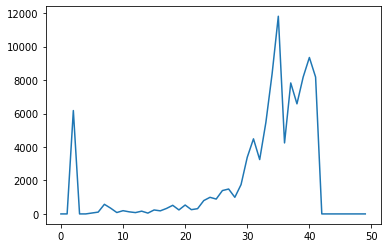

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(len(h)), h)
plt.show()

In [14]:
def naive(p, t):
  '''
  p is the sequence we're searching for
  t is the text or reference 
  '''
  occurences = []

  for i in range(len(t) - len(p) + 1):
    match = True
    for j in range(len(p)):
      if not t[i+j] == p[j]:
        match = False
        break
    if match:
        occurences.append(i)

  return occurences

In [18]:
for s in seqs:
  o = naive('ACCCTAACCCTAACCCT', s)
  if len(o) == 0:
    print('_________________________________________')
  else:
    print(o)

[2, 8, 14, 20, 26, 32, 38, 56]
[2, 8, 14, 20, 26, 32, 38, 55, 61, 67, 73, 79]
_________________________________________
_________________________________________
[3, 9, 26, 32, 38, 44, 50, 56, 79]
[1, 7, 13]
_________________________________________
[2, 8, 14, 20, 26, 32]
_________________________________________
_________________________________________
[2, 8, 31, 37, 43, 49, 55, 61, 67]
_________________________________________
[0, 6, 29, 35, 41, 47, 53, 59, 65, 71]
[4, 27, 33, 39, 45, 51, 57, 63]
[3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69, 75, 81]
[1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73, 79]
[1, 7, 13, 19, 25, 31, 37, 43, 49, 55]
_________________________________________
_________________________________________
_________________________________________
[13, 19, 25, 31, 37, 43, 49, 55]
_________________________________________
[1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73]
[12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78]
[12, 18, 24, 30, 36, 60, 66, 72, 78]
[12, 18,